# Bank Term Deposit Predictions | Machine Learning Project

## 1. Problem Statement

This dataset, titled Direct Marketing Campaigns for Bank Term Deposits, is a collection of data related to the direct marketing campaigns conducted by a Portuguese banking institution. These campaigns primarily involved phone calls with customers, and the objective was to determine whether or not a customer would subscribe to a term deposit offered by the bank.

The purpose behind this dataset is to train a predictive model that can determine if a given customer will subscribe to a term deposit based on these various features. By analyzing historical data on successful and unsuccessful subscription outcomes, patterns can be identified which help predict future subscription behavior.

In addition to training data, there is also test data included in this dataset. This test data can be used to evaluate how well our trained predictive model performs when applied to new, unseen instances.

By utilizing this dataset and applying machine learning techniques, businesses in similar domains can better understand their target audience and optimize their marketing efforts towards potential subscribers who are more likely to respond positively to these campaigns

## 2. About Dataset

The dataset contains various features that provide insights into customer attributes and campaign outcomes. These features include:

- Age: The age of the customer.
- Job: The occupation of the customer.
- Marital Status: The marital status of the customer.
- Education: The education level of the customer.
- Default: Whether or not the customer has credit in default.
- Balance: The balance of the customer's account.
- Housing Loan: Whether or not the customer has a housing loan.
- Contact Communication Type: The method used to contact the customer (e.g., telephone, cellular).
- Day: The day of the month when the last contact with the customers was made.
- Duration: The duration (in seconds) of the last contact with customers during a campaign.
- Campaign Contacts Count: Number of contacts performed during this campaign for each customer.
- pdays : number days passed since previously contacted form previous camapign.
- poutcome : outcome from previous marketing campaign

## 3. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

## 4. Load and Explore Dataset

In [2]:
train_data = pd.read_csv("bank_term_deposit_train.csv")
test_data = pd.read_csv("bank_term_deposit_test.csv")
print("Dimension of Data Training", train_data.shape)
print("Dimension of Data Testing", test_data.shape)

Dimension of Data Training (45211, 17)
Dimension of Data Testing (4521, 17)


In [3]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
train_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
train_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
train_data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [7]:
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
train_data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


## 5. Check Missing Value

In [9]:
train_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
train_data.duplicated().sum()

0

In [11]:
columns = [col for col in train_data.columns if len(train_data[col].unique()) <=4]
for col in columns:
    unique = train_data[col].unique()
    print(col)
    print(unique)
    print('-'*20)

marital
['married' 'single' 'divorced']
--------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
--------------------
default
['no' 'yes']
--------------------
housing
['yes' 'no']
--------------------
loan
['no' 'yes']
--------------------
contact
['unknown' 'cellular' 'telephone']
--------------------
poutcome
['unknown' 'failure' 'other' 'success']
--------------------
y
['no' 'yes']
--------------------


## 6. Exploratory Data Analysis

In [12]:
categorical_columns = [col for col in train_data.columns if train_data[col].dtypes =='O']
numerical_columns = [col for col in train_data.columns if col not in categorical_columns]
binary_columns = [col for col in train_data.columns if len(train_data[col].unique())==2]
discrete_columns = [col for col in train_data.columns if (len(train_data[col].unique())<=4) and (col not in binary_columns)]
continous_columns = [col for col in numerical_columns if len(train_data[col].unique())>15]

##### a. Binary Columns

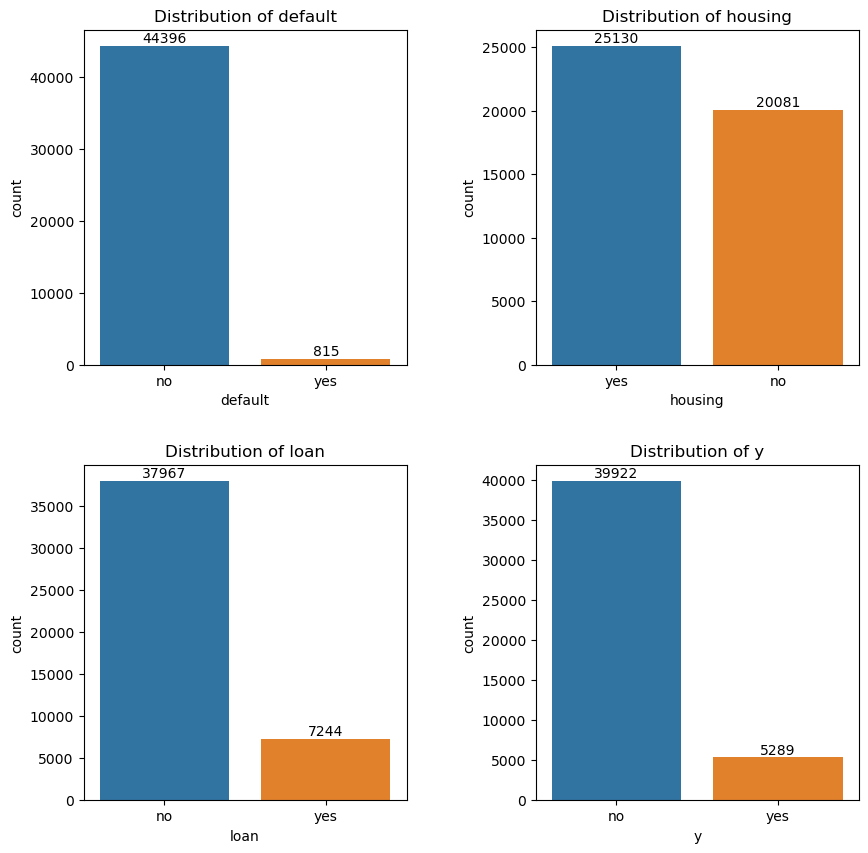

In [13]:
plt.figure(figsize=(10,10))

for abs, col in enumerate(binary_columns,1):
    plt.subplot(2,2,abs)
    ax = sns.countplot(data=train_data, x=col)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.subplots_adjust(hspace=0.3, wspace=0.4)
    plt.title('Distribution of {}'.format(col))
plt.show()

##### b. Discrete Columns

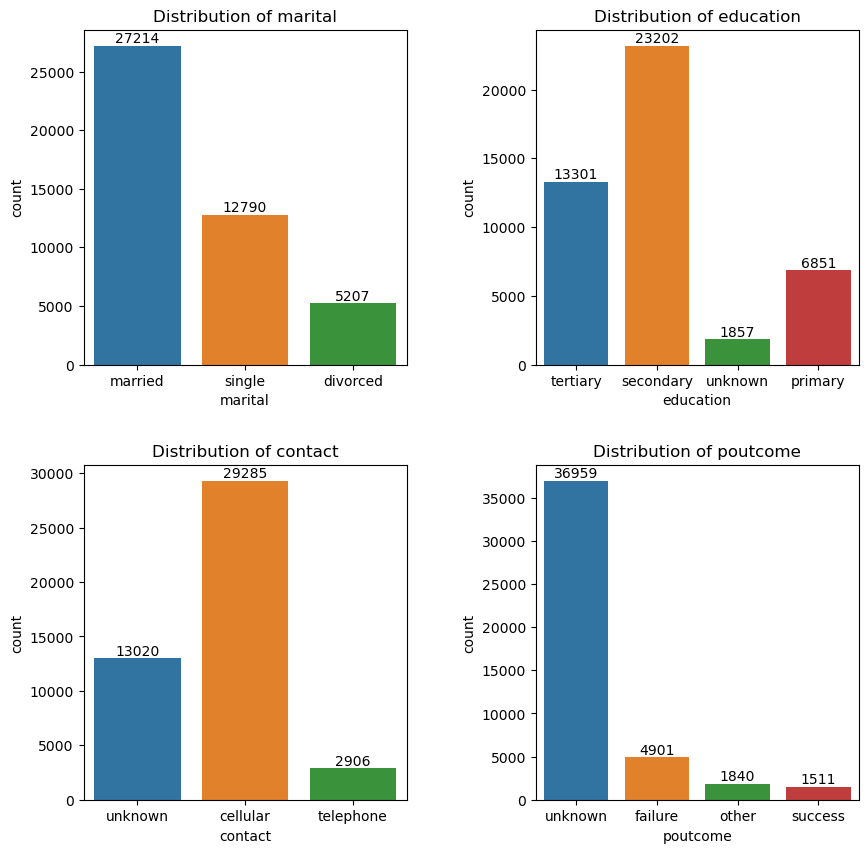

In [14]:
plt.figure(figsize=(10,10))

for abs, col in enumerate(discrete_columns,1):
    plt.subplot(2,2,abs)
    ax = sns.countplot(data=train_data, x=col)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.title("Distribution of {}".format(col))
    plt.subplots_adjust(hspace=0.3, wspace=0.4)
plt.show()

##### c. Continuous Columns

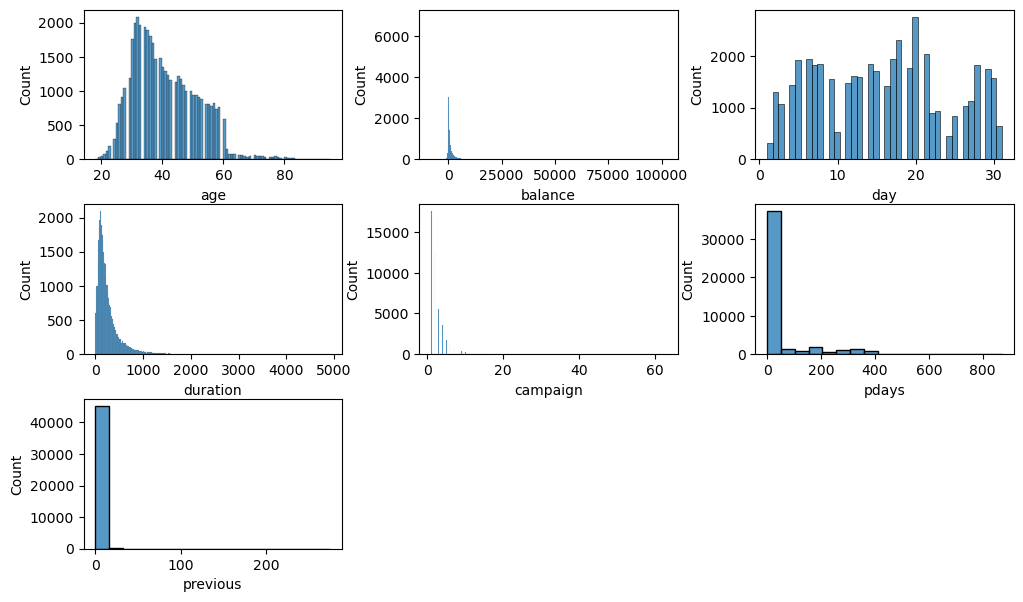

In [15]:
plt.figure(figsize=(12,7))

for i, j in enumerate(continous_columns):
    plt.subplot(3,3,i+1)
    sns.histplot(data=train_data, x=j)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

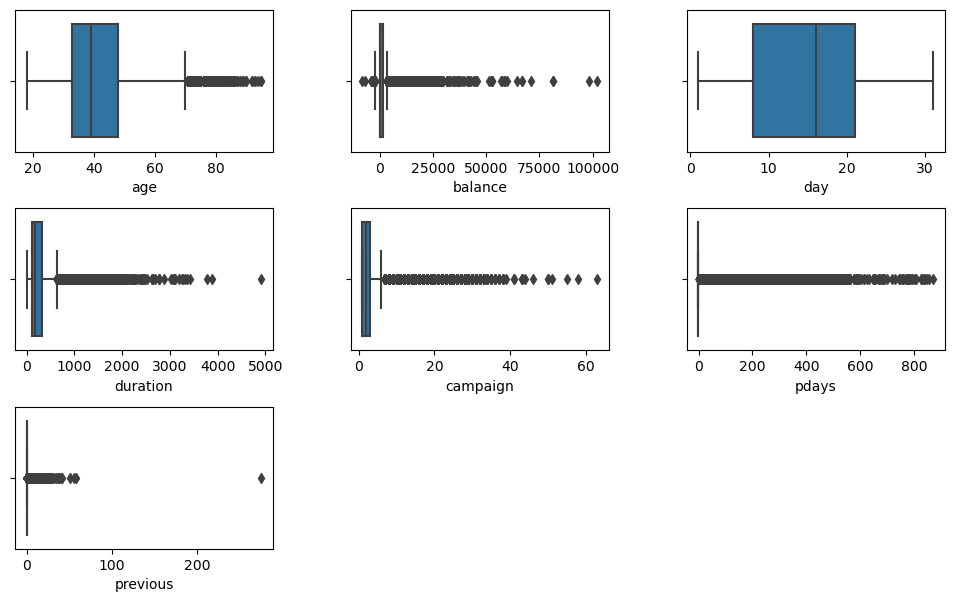

In [16]:
plt.figure(figsize=(12,7))

for i, j in enumerate(continous_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=train_data, x=j)
    plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

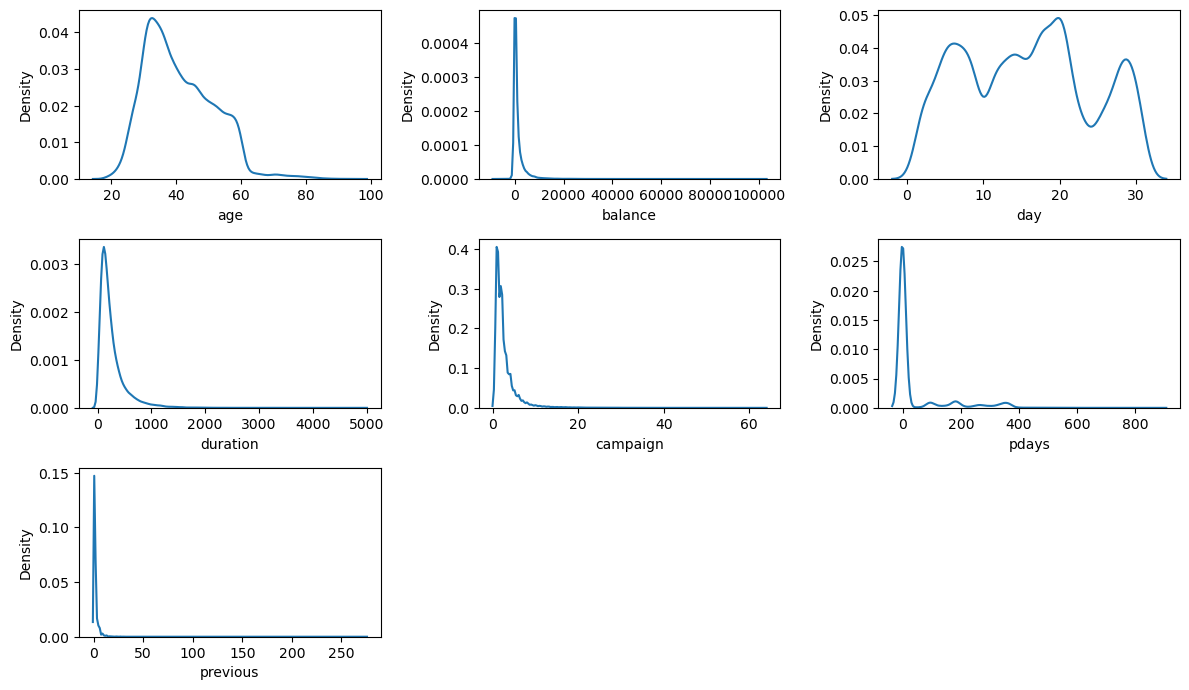

In [17]:
plt.figure(figsize=(12,7))

for i, j in enumerate(continous_columns):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=train_data, x=j)
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.tight_layout()
plt.show()

In [18]:
# skewness and kurtosis 

def skew_kurt_calculate(data, column):
    skewness = []
    kurtosis = []
    for col in column:
        skewness.append(data[col].skew())
        kurtosis.append(data[col].kurt())
    return skewness, kurtosis

skew, kurt = skew_kurt_calculate(train_data, continous_columns)
skew_kurt_df = pd.DataFrame({
    'Feature': continous_columns,
    'Skewness': skew,
    'Kurtosis': kurt
})
skew_kurt_df

,Feature,Skewness,Kurtosis
0,age,0.684818,0.319570
1,balance,8.360308,140.751547
2,day,0.093079,-1.059897
3,duration,3.144318,18.153915
4,campaign,4.898650,39.249651
5,pdays,2.615715,6.935195
6,previous,41.846454,4506.860660


- __Skewness__
Jika skewness adalah 0, maka distribusi data dianggap simetris. Nilai skewness positif menunjukkan bahwa ekor distribusi panjangnya di sebelah kanan, sementara nilai skewness negatif menunjukkan bahwa ekor distribusi panjangnya di sebelah kiri.

- __Kurtosis__ 
Dalam konteks distribusi normal, kurtosis yang baik adalah 0. Ini berarti bahwa distribusi data tersebut memiliki puncak yang sesuai dan ekor yang tidak terlalu berat atau terlalu ringan dibandingkan dengan distribusi normal.

##### d. Correlation

<Axes: >

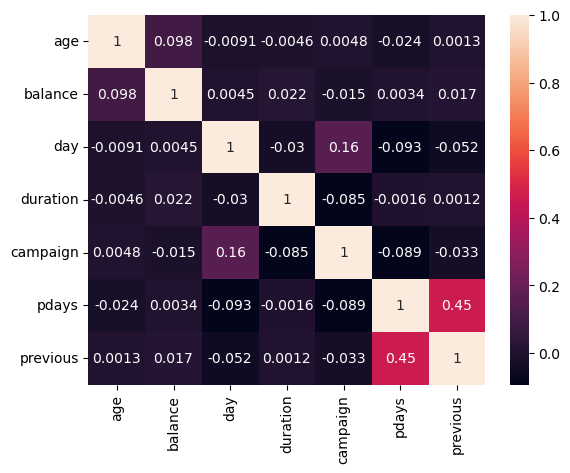

In [19]:
corr = train_data[numerical_columns].corr()
sns.heatmap(corr, annot=True)

## 7. Oversampling Target

In [20]:
target_no = train_data[train_data['y']=='no']
target_yes = train_data[train_data['y']=='yes']
target_no.shape[0], target_yes.shape[0]

(39922, 5289)

In [21]:
target_no = target_no.sample(target_yes.shape[0])
target_no.shape[0]

5289

In [22]:
train_data = pd.concat([target_no, target_yes])
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
11135,42,admin.,divorced,secondary,no,0,yes,yes,unknown,18,jun,185,4,-1,0,unknown,no
6956,58,retired,married,secondary,no,255,no,no,unknown,28,may,362,3,-1,0,unknown,no
23503,35,technician,married,secondary,no,0,no,no,cellular,28,aug,19,14,-1,0,unknown,no
29109,27,student,single,secondary,no,1411,no,no,cellular,2,feb,92,1,-1,0,unknown,no
19481,43,technician,married,tertiary,no,1663,no,no,cellular,7,aug,185,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [23]:
train_data = train_data.sample(frac=1, random_state=42)
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2831,39,management,divorced,tertiary,no,517,yes,yes,unknown,14,may,1328,1,-1,0,unknown,yes
26462,30,services,married,secondary,no,3929,yes,no,cellular,20,nov,593,1,-1,0,unknown,yes
43328,46,management,divorced,tertiary,no,624,no,no,cellular,18,mar,420,1,276,1,other,yes
39899,32,admin.,married,tertiary,no,653,no,no,cellular,2,jun,84,1,-1,0,unknown,yes
37020,36,blue-collar,married,primary,no,319,yes,no,cellular,13,may,774,2,301,1,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056,24,management,married,secondary,no,867,yes,no,unknown,20,jun,546,10,-1,0,unknown,yes
34348,43,entrepreneur,married,secondary,no,0,no,no,telephone,4,may,6,4,-1,0,unknown,no
3702,42,admin.,divorced,secondary,no,153,yes,no,unknown,16,may,844,1,-1,0,unknown,yes
13312,54,housemaid,married,primary,no,8,no,yes,telephone,8,jul,116,2,-1,0,unknown,no


In [24]:
train_data.shape

(10578, 17)

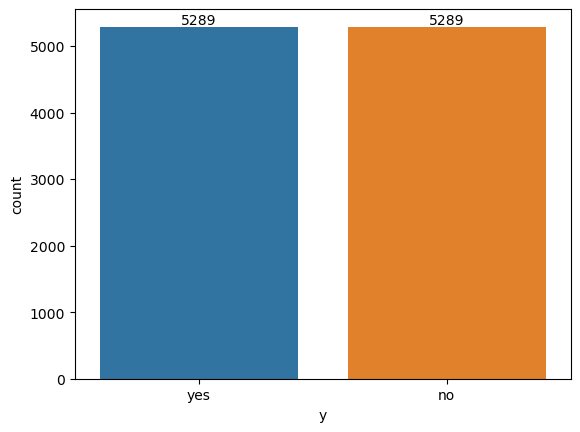

In [25]:
ax = sns.countplot(data=train_data, x='y')
ax.bar_label(ax.containers[0])
plt.show()

## 8. Feature Engineering

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def feature_engineering(data):
    le = LabelEncoder()
    scaler = StandardScaler()
    ohe = OneHotEncoder()

    X = data.drop(data.columns[-1], axis=1)
    y = data[data.columns[-1]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for col in X.columns:
        if X[col].dtypes == 'object':
            X_train[col] = le.fit_transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
        else:
            X_train[col] = scaler.fit_transform(X_train[[col]])
            X_test[col] = scaler.transform(X_test[[col]])
    
    if y.dtype == 'object':
        y_train = le.fit_transform(y_train)
        y_test = le.transform(y_test)
    else:
        y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
        y_test = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

    return X_train, X_test, y_train, y_test

In [27]:
X_train = feature_engineering(train_data)[0]
X_val = feature_engineering(train_data)[1]
y_train = feature_engineering(train_data)[2]
y_val = feature_engineering(train_data)[3]

## 9. Model Development

In [28]:
# Training Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Prediction
y_pred = logreg.predict(X_val)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [30]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classification = classification_report(y_val, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1565
           1       0.81      0.79      0.80      1609

    accuracy                           0.80      3174
   macro avg       0.80      0.80      0.80      3174
weighted avg       0.80      0.80      0.80      3174



## 10. Build Multiple Model Classification

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [32]:
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC(probability=True)
nb = GaussianNB()
xgb = XGBClassifier()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

models = [logreg, dt, rf, knn, svc, nb, xgb]

accuracy_score_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []
roc_auc_list = []


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    accuracy_score_list.append(accuracy)
    precision_score_list.append(precision)
    recall_score_list.append(recall)
    f1_score_list.append(f1)
    roc_auc_list.append(roc_auc)

In [34]:
model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest','K-Nearest Neighbors', 'Support Vector Machine', 'Gaussian NB', 'XGBoost']


dictionary = {'Model': model_name,
             'Accuracy': accuracy_score_list,
             'Precision': precision_score_list,
             'Recall': recall_score_list,
             'f1': f1_score_list,
             'ROC AUC': roc_auc_list}

report_df = pd.DataFrame(dictionary)
report_df

,Model,Accuracy,Precision,Recall,f1,ROC AUC
0,Logistic Regression,0.797101,0.808307,0.786203,0.797101,0.797255
1,Decision Tree,0.786704,0.797194,0.776880,0.786906,0.786843
2,Random Forest,0.850032,0.830321,0.885022,0.856799,0.849540
3,K-Nearest Neighbors,0.801197,0.827748,0.767557,0.796517,0.801670
4,Support Vector Machine,0.818841,0.817178,0.827843,0.822476,0.818714
5,Gaussian NB,0.751733,0.731268,0.806712,0.767139,0.750960
6,XGBoost,0.860428,0.850782,0.878807,0.864567,0.860170


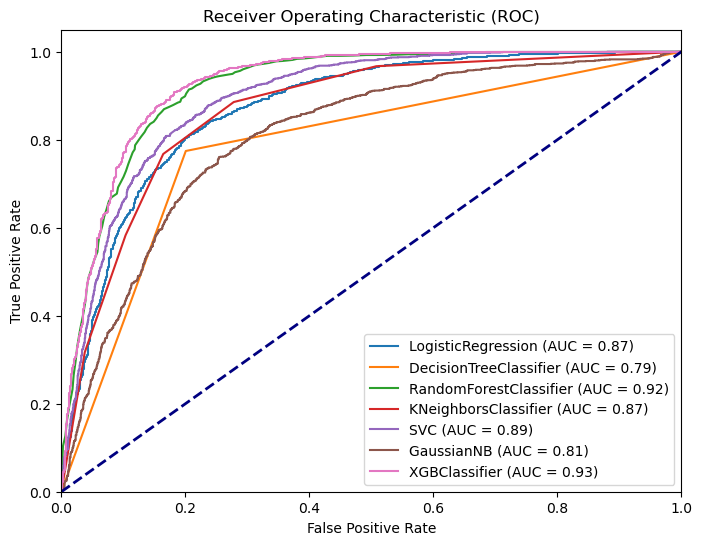

In [35]:
from sklearn.metrics import roc_curve, auc

models = [logreg, dt, rf, knn, svc, nb, xgb]

# Melakukan pelatihan dan evaluasi untuk setiap model
plt.figure(figsize=(8, 6))
for model in models:
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

# Menambahkan garis dasar (random guessing)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Menyesuaikan dan menampilkan plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


the best model is XGBoost

## 11. Build Model Using Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score

models = [logreg, dt, rf, knn, svc, nb, xgb]

acc_list = []
pre_list = []
recall_list = []
f1_list = []

feature = X_val
label = y_val
CV = 5

for model in models:
    accuries = cross_val_score(model, feature, label, scoring='accuracy', cv=CV)
    acc_list.append(accuries.mean())
for model in models:
    precisions = cross_val_score(model, feature, label, scoring='precision', cv=CV)
    pre_list.append(precisions.mean())
for model in models:
    recalls = cross_val_score(model, feature, label, scoring='recall', cv=CV)
    recall_list.append(recalls.mean())
for model in models:
    f1s = cross_val_score(model, feature, label, scoring='f1', cv=CV)
    f1_list.append(f1s.mean())

In [37]:
dictionary_cv = {'Model': model_name,
             'Accuracy': acc_list,
                'Precision': pre_list,
                'Recall': recall_list,
                'F1': f1_list}

report_df_cv = pd.DataFrame(dictionary_cv)
report_df_cv

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.799305,0.811027,0.788708,0.799387
1,Decision Tree,0.757714,0.768508,0.745169,0.752888
2,Random Forest,0.841211,0.823115,0.881314,0.848082
3,K-Nearest Neighbors,0.774730,0.803563,0.735870,0.767973
4,Support Vector Machine,0.803402,0.804631,0.809210,0.806731
5,Gaussian NB,0.746698,0.730097,0.797397,0.761609
6,XGBoost,0.850973,0.839409,0.873847,0.856080


## 12. Hyperparameter Tunning

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]}

grid_seacrh = GridSearchCV(estimator = xgb, param_grid = param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_seacrh.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [39]:
grid_seacrh.best_params_

{'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}

In [40]:
grid_seacrh.best_score_

0.8683130463346533

## 13. Build New Model With Best Parameters

In [41]:
xgb_model = XGBClassifier(gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300)
xgb_model.fit(X_train, y_train)
y_pred_val = xgb_model.predict(X_val)
y_pred_val

array([0, 1, 0, ..., 0, 0, 1])

In [42]:
classification = classification_report(y_val, y_pred_val)
print("Final Report",classification)

Final Report               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1565
           1       0.85      0.89      0.87      1609

    accuracy                           0.87      3174
   macro avg       0.87      0.87      0.87      3174
weighted avg       0.87      0.87      0.87      3174



In [43]:
accuracy_cv = cross_val_score(xgb_model, 
                X_val, 
                y_val, 
                scoring='accuracy',
                cv=CV)
precision_cv = cross_val_score(xgb_model, 
                X_val, 
                y_val, 
                scoring='precision',
                cv=CV)
recall_cv = cross_val_score(xgb_model, 
                X_val, 
                y_val, 
                scoring='recall',
                cv=CV)
f1_cv = cross_val_score(xgb_model, 
                X_val, 
                y_val, 
                scoring='f1',
                cv=CV)

In [44]:
print(f"Accuracy New Model with Best Parameters", round(accuracy_cv.mean()*100,2), "%")
print(f"Precision New Model with Best Parameters", round(precision_cv.mean()*100,2), "%")
print(f"Recall New Model with Best Parameters", round(recall_cv.mean()*100,2), "%")
print(f"f1 Score New Model with Best Parameters", round(f1_cv.mean()*100,2), "%")

Accuracy New Model with Best Parameters 85.54 %
Precision New Model with Best Parameters 84.47 %
Recall New Model with Best Parameters 87.63 %
f1 Score New Model with Best Parameters 86.01 %


## 14. Model Evaluation With Data Test

In [45]:
feature_engineering(test_data)

(           age  job  marital  education  default   balance  housing  loan  \
 4153  0.071992    9        1          1        0 -0.350120        1     0   
 2085 -0.770261    1        1          1        0 -0.539298        1     0   
 1891 -0.863845    4        2          2        0 -0.271082        1     1   
 3611 -1.238180    9        2          1        0 -0.368781        1     0   
 4015 -0.489510    9        1          1        0  1.648513        1     0   
 ...        ...  ...      ...        ...      ...       ...      ...   ...   
 4426 -0.021592    0        1          2        0  0.050924        0     0   
 466  -0.676677    6        1          1        0 -0.646512        1     0   
 3092  0.446327    4        1          2        0 -0.319749        1     0   
 3772  0.539910    4        2          2        0 -0.350120        0     0   
 860   1.569331    1        1          0        0 -0.398055        0     0   
 
       contact       day  month  duration  campaign     pdays 

In [46]:
X_test = pd.concat([feature_engineering(test_data)[0], feature_engineering(test_data)[1]])
y_test = np.concatenate([feature_engineering(test_data)[2], feature_engineering(test_data)[3]])

In [47]:
y_pred_test = xgb_model.predict(X_test)

classification = classification_report(y_test, y_pred_test)
print("Final Report",classification)

Final Report               precision    recall  f1-score   support

           0       0.99      0.66      0.80      4000
           1       0.27      0.97      0.43       521

    accuracy                           0.70      4521
   macro avg       0.63      0.82      0.61      4521
weighted avg       0.91      0.70      0.75      4521



Copyright by ahmadalfianfaisal04@gmail.com